In [1]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import h5py

2024-09-03 05:47:22.067751: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-03 05:47:22.067879: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-03 05:47:22.247568: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
path1 = '/kaggle/input/happy-house-dataset/train_happy.h5'
path2 = '/kaggle/input/happy-house-dataset/test_happy.h5'
df1 = h5py.File(path1, 'r')
df2 = h5py.File(path2, 'r')
df1.keys()
# df2.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [3]:
list_classes = df1['list_classes'][:]
train_set_x = df1['train_set_x'][:]
train_set_y = df1['train_set_y'][:]
train_set_y.shape

(600,)

In [4]:
list_classes = df2['list_classes'][:]
test_set_x = df2['test_set_x'][:]
test_set_y = df2['test_set_y'][:]
test_set_x.shape

(150, 64, 64, 3)

In [5]:
#Normalize the vectors
X_train = train_set_x/255
X_test = test_set_x/255

#Reshape
Y_train = train_set_y.T
Y_test = test_set_y.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600,)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150,)


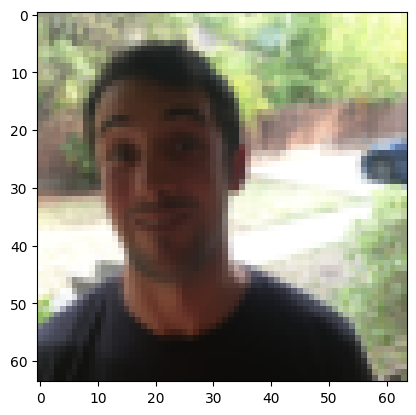

1


In [6]:
plt.imshow(train_set_x[123])
plt.show()
print(Y_train[123])

In [7]:
model1 = tf.keras.Sequential([
    tf.keras.layers.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3)),
    tf.keras.layers.Conv2D(32, (7, 7), strides=(1, 1)),
    tf.keras.layers.BatchNormalization(axis=3),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
for layer in model1.layers:
    print(layer)

<ZeroPadding2D name=zero_padding2d, built=True>
<Conv2D name=conv2d, built=True>
<BatchNormalization name=batch_normalization, built=True>
<ReLU name=re_lu, built=True>
<MaxPooling2D name=max_pooling2d, built=True>
<Flatten name=flatten, built=True>
<Dense name=dense, built=True>


In [9]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
model1.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.5448 - loss: 2.4870
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8108 - loss: 0.4348
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9182 - loss: 0.2004
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9302 - loss: 0.1489
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9859 - loss: 0.0659
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9741 - loss: 0.0901
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9538 - loss: 0.1367
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9851 - loss: 0.0697
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9787 - loss: 0.0631
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9845 - loss: 0.0549


In [11]:
model1.evaluate(X_test, Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9130 - loss: 0.2245


[0.20284530520439148, 0.9200000166893005]

In [12]:
index = 25

# Select a single test example (e.g., the second example in X_test)
single_test_example = X_test[index]

# Add a batch dimension to the input
single_test_example_batch = np.expand_dims(single_test_example, axis=0)

# Predict using the model
prediction = model1.predict(single_test_example_batch)

# Print the prediction
print("Prediction:", prediction)

# If applicable, print the actual value
print("Actual Value:", Y_test[index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Prediction: [[0.02310463]]
Actual Value: 0


In [13]:
from PIL import Image

In [16]:
def classify_image(image_path, model, input_shape=(64, 64, 3)):
    """
    Classify an image using a pre-trained model and display the image.

    Parameters:
    - image_path: str, path to the input image.
    - model: trained Keras model.
    - input_shape: tuple, the expected input shape of the model.

    Returns:
    - prediction: float, predicted probability of the positive class.
    - class_label: int, predicted class label (0 or 1).
    """
    # Load the image
    image = Image.open(image_path)
    
    # Resize the image to match the model's input shape
    image_resized = image.resize(input_shape[:2])
    
    # Convert the image to a numpy array
    image_array = np.array(image_resized)
    
    # Normalize the image
    image_array = image_array / 255.0
    
    # Add a batch dimension
    image_array = np.expand_dims(image_array, axis=0)
    
    # Predict the class
    prediction = model.predict(image_array)
    
    # Convert prediction to class label
    class_label = (prediction > 0.5).astype(int)[0, 0]
    
    # Display the image
    plt.imshow(image_resized)
    plt.title(f'Prediction: {prediction[0, 0]:.4f}, Class Label: {class_label}')
    plt.axis('off')  # Hide axes
    plt.show()
    
    return prediction[0, 0], class_label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


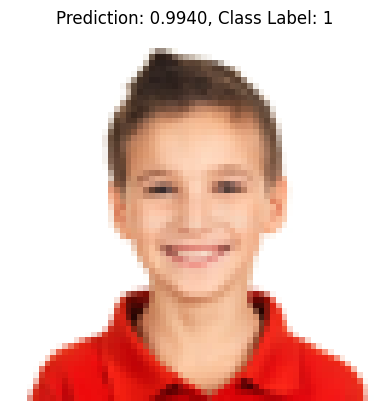

Prediction: 0.9940151572227478
Class Label: 1


In [17]:
# Example usage
image_path = '/kaggle/input/happyfacee/happy1.webp'
prediction, class_label = classify_image(image_path, model1)

print(f'Prediction: {prediction}')
print(f'Class Label: {class_label}')